### Step 1: Import Libraries


In [1]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  # For enhanced data visualization

# Import Scikit-Learn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# from sklearn.model_selection import GridSearchCV

### Step 2: Load and Explore Dataset


In [2]:
# Load dataset
file_path = "../datasets/thyroid-disease.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# Show dataset info (columns, data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
# Count missing values in each column
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [5]:
# Check unique values in each column (to understand categorical features)
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [6]:
# Print unique values for each column
print('Unique values in each column: \n')
for col in df.columns:
    print(f"'{col}': {df[col].unique()}")

Unique values in each column: 

'Age': [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
'Gender': ['F' 'M']
'Smoking': ['No' 'Yes']
'Hx Smoking': ['No' 'Yes']
'Hx Radiothreapy': ['No' 'Yes']
'Thyroid Function': ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
'Physical Examination': ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
'Adenopathy': ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
'Pathology': ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
'Focality': ['Uni-Focal' 'Multi-Focal']
'Risk': ['Low' 'Intermediate' 'High']
'T': ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
'N': ['N0' 'N1b' 'N1a']
'M': ['M0' 'M1']
'Stage': ['I' 'II' 'IVB' 'III' 'IVA']
'Response': ['Indeterminate' 

### Step 3: Preprocessing Data


In [7]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['age', 'gender', 'smoking', 'hx_smoking', 'hx_radiothreapy',
       'thyroid_function', 'physical_examination', 'adenopathy', 'pathology',
       'focality', 'risk', 't', 'n', 'm', 'stage', 'response', 'recurred'],
      dtype='object')

In [8]:
binary_data = ['gender', 'smoking', 'hx_smoking', 'hx_radiothreapy', 'focality', 'm', 'recurred']
numerical_data = ['age']
ordinal_data = ['risk', 't', 'n', 'stage', 'response']
nominal_data = ['thyroid_function', 'physical_examination', 'adenopathy','pathology']

print("Binary Data:", binary_data)
print("Numerical Data:", numerical_data)
print("Ordinal Categorical Data:", ordinal_data)
print("Nominal Categorical Data:", nominal_data)

Binary Data: ['gender', 'smoking', 'hx_smoking', 'hx_radiothreapy', 'focality', 'm', 'recurred']
Numerical Data: ['age']
Ordinal Categorical Data: ['risk', 't', 'n', 'stage', 'response']
Nominal Categorical Data: ['thyroid_function', 'physical_examination', 'adenopathy', 'pathology']


In [9]:
# Convert binary categorical features (Yes/No, Male/Female) to 0/1
for col in binary_data:
    df[col] = df[col].map({'No': 0, 'Yes': 1, 'M': 1, 'F': 0, 'M0': 0, 'M1': 1, 'Uni-Focal': 0, 'Multi-Focal': 1})

df[binary_data].head()

,gender,smoking,hx_smoking,hx_radiothreapy,focality,m,recurred
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0


In [10]:
# Converting ordinal data to numerical data following specific order
# Ordinal Data Mapping
ordinal_mappings = {
    'risk': {'Low': 0, 'Intermediate': 1, 'High': 2},
    't': {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6},
    'n': {'N0': 0, 'N1a': 1, 'N1b': 2},
    'stage': {'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4},
    'response': {'Excellent': 0, 'Indeterminate': 1, 'Biochemical Incomplete': 2, 'Structural Incomplete': 3}
}

# Convert Ordinal Data
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

df[ordinal_data].head()

,risk,t,n,stage,response
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [11]:
df[nominal_data].head()

,thyroid_function,physical_examination,adenopathy,pathology
0,Euthyroid,Single nodular goiter-left,No,Micropapillary
1,Euthyroid,Multinodular goiter,No,Micropapillary
2,Euthyroid,Single nodular goiter-right,No,Micropapillary
3,Euthyroid,Single nodular goiter-right,No,Micropapillary
4,Euthyroid,Multinodular goiter,No,Micropapillary


In [12]:
# Apply M-1 Encoding (One-Hot Encoding with First Category Dropped)
ohe_m1 = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = ohe_m1.fit_transform(df[nominal_data])
encoded_col_names = ohe_m1.get_feature_names_out(nominal_data)

# Convert to DataFrame and merge with original df (dropping original categorical columns)
df = df.drop(columns=nominal_data).reset_index(drop=True)
df[encoded_col_names] = encoded_cols

# Display transformed dataset
df.head()

,age,gender,smoking,hx_smoking,hx_radiothreapy,focality,risk,t,n,m,...,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary
0,27,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,62,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,62,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df.isnull().sum().sum(), df.shape

(0, (383, 29))

In [14]:
# Choose Scaling Method: Uncomment the one you prefer
# Standardization (Z-score scaling)
scaler = StandardScaler()

# Min-Max Scaling (Rescales to range [0,1])
# scaler = MinMaxScaler()

# Convert df back to DataFrame
df = pd.DataFrame(df, columns=df.columns)

# Scale all numerical columns (df now only contains numerical features)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,age,gender,smoking,hx_smoking,hx_radiothreapy,focality,risk,t,n,m,...,physical_examination_Single nodular goiter-left,physical_examination_Single nodular goiter-right,adenopathy_Extensive,adenopathy_Left,adenopathy_No,adenopathy_Posterior,adenopathy_Right,pathology_Hurthel cell,pathology_Micropapillary,pathology_Papillary
0,-0.917439,-0.477037,-0.383023,-0.280844,-0.136444,-0.742029,-0.674696,-1.6429,-0.633987,-0.22207,...,1.817518,-0.759033,-0.136444,-0.215518,0.618604,-0.072452,-0.378528,-0.234726,2.641811,-1.729041
1,-0.454315,-0.477037,-0.383023,3.560698,-0.136444,-0.742029,-0.674696,-1.6429,-0.633987,-0.22207,...,-0.550201,-0.759033,-0.136444,-0.215518,0.618604,-0.072452,-0.378528,-0.234726,2.641811,-1.729041
2,-0.718957,-0.477037,-0.383023,-0.280844,-0.136444,-0.742029,-0.674696,-1.6429,-0.633987,-0.22207,...,-0.550201,1.317465,-0.136444,-0.215518,0.618604,-0.072452,-0.378528,-0.234726,2.641811,-1.729041
3,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,-0.742029,-0.674696,-1.6429,-0.633987,-0.22207,...,-0.550201,1.317465,-0.136444,-0.215518,0.618604,-0.072452,-0.378528,-0.234726,2.641811,-1.729041
4,1.398184,-0.477037,-0.383023,-0.280844,-0.136444,1.347656,-0.674696,-1.6429,-0.633987,-0.22207,...,-0.550201,-0.759033,-0.136444,-0.215518,0.618604,-0.072452,-0.378528,-0.234726,2.641811,-1.729041


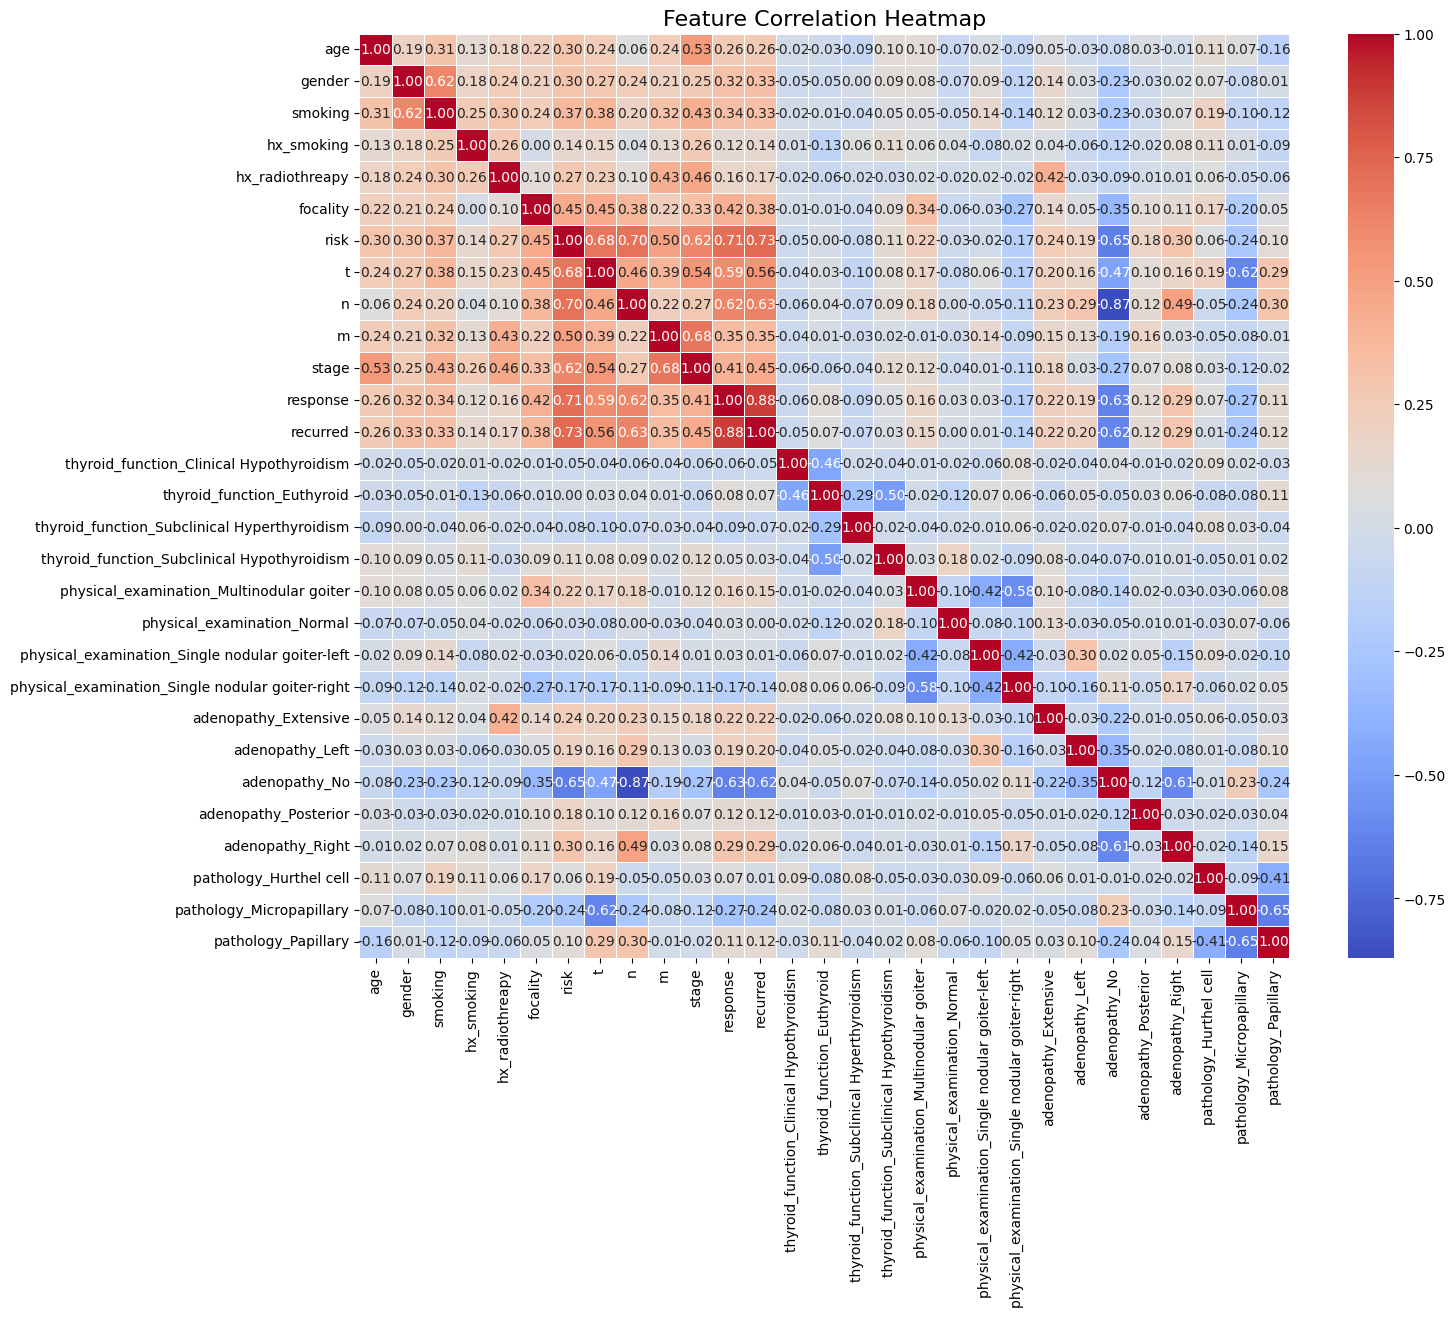

In [15]:
# Compute correlation matrix
corr_matrix = df_scaled.corr().round(2)  # Round to 2 decimal places

# Set figure size for clarity
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=16)

# Display the plot
plt.show()

In [16]:
df_scaled['tumor_severity'] = (df_scaled['t'] + df_scaled['n'] + df_scaled['m'])/3
df_scaled.drop(['t', 'n', 'm'], axis=1, inplace=True)
df_scaled.shape

(383, 27)

In [17]:
# Fill missing values
df_scaled.fillna(df_scaled.median(numeric_only=True), inplace=True)  # Fill numeric NaNs with median
df_scaled.fillna(df_scaled.mode().iloc[0], inplace=True)  # Fill categorical NaNs with mode

# Verify no missing values remain
print(df_scaled.isnull().sum().sum())  # Should print 0 if no missing values


0


### Step 4: Training Model


In [18]:
# Define features (X) and target (y)
X = df_scaled.drop(columns=['recurred'])  # Drop the target variable
y = df['recurred'].astype(int)  # Target variable

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# Define the kernels to test
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an array of pipelines for each kernel
pipelines = {kernel: Pipeline([
    ('scaler', StandardScaler()),  # Ensuring scaling is part of the pipeline
    ('svm', SVC(kernel=kernel, probability=True))  # Enable probability estimates
]) for kernel in svm_kernels}

pipelines

{'linear': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(kernel='linear', probability=True))]),
 'poly': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(kernel='poly', probability=True))]),
 'rbf': Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))]),
 'sigmoid': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svm', SVC(kernel='sigmoid', probability=True))])}

In [20]:
# Train each model and store in a dictionary
trained_models = {}

for kernel, pipeline in pipelines.items():
    print(f"Training SVM with {kernel} kernel...")
    pipeline.fit(X_train, y_train)
    trained_models[kernel] = pipeline

print("All SVM models trained successfully!")

Training SVM with linear kernel...
Training SVM with poly kernel...
Training SVM with rbf kernel...
Training SVM with sigmoid kernel...
All SVM models trained successfully!



ℹ️ℹ️ Evaluation for linear kernel:
✅ Accuracy: 0.98
✅ Precision: 1.00
✅ Recall: 0.94
✅ F1 Score: 0.97

✅ Confusion Matrix:
[[83  0]
 [ 2 30]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      0.94      0.97        32

    accuracy                           0.98       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.98      0.98      0.98       115



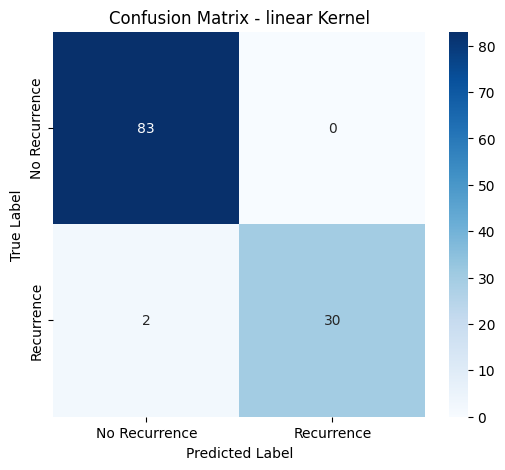


ℹ️ℹ️ Evaluation for poly kernel:
✅ Accuracy: 0.93
✅ Precision: 1.00
✅ Recall: 0.75
✅ F1 Score: 0.86

✅ Confusion Matrix:
[[83  0]
 [ 8 24]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        83
           1       1.00      0.75      0.86        32

    accuracy                           0.93       115
   macro avg       0.96      0.88      0.91       115
weighted avg       0.94      0.93      0.93       115



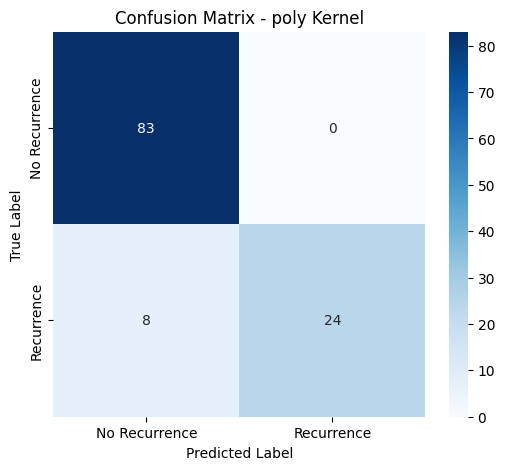


ℹ️ℹ️ Evaluation for rbf kernel:
✅ Accuracy: 0.98
✅ Precision: 1.00
✅ Recall: 0.94
✅ F1 Score: 0.97

✅ Confusion Matrix:
[[83  0]
 [ 2 30]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      0.94      0.97        32

    accuracy                           0.98       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.98      0.98      0.98       115



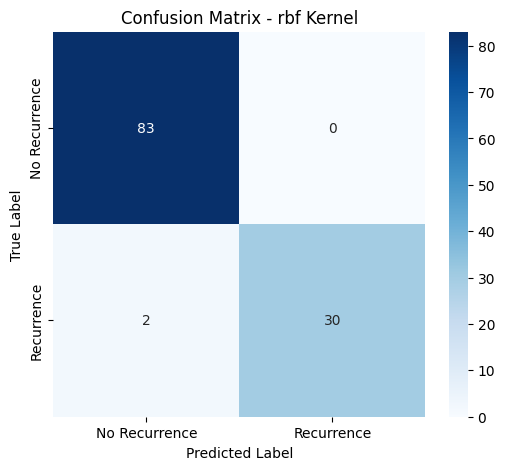


ℹ️ℹ️ Evaluation for sigmoid kernel:
✅ Accuracy: 0.97
✅ Precision: 0.94
✅ Recall: 0.94
✅ F1 Score: 0.94

✅ Confusion Matrix:
[[81  2]
 [ 2 30]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.94      0.94      0.94        32

    accuracy                           0.97       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115



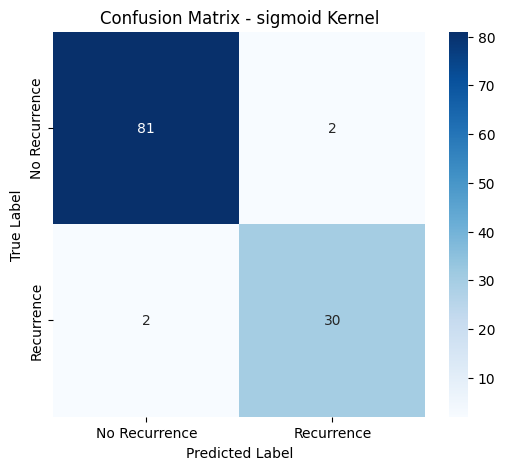

In [21]:
# Evaluate each trained SVM model
for kernel, model in trained_models.items():
    print(f"\nℹ️ℹ️ Evaluation for {kernel} kernel:")
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print Results
    print(f"✅ Accuracy: {accuracy:.2f}")
    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1 Score: {f1:.2f}")
    
    print("\n✅ Confusion Matrix:")
    print(conf_matrix)
    
    print("\n✅ Classification Report:")
    print(class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Recurrence", "Recurrence"], yticklabels=["No Recurrence", "Recurrence"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.show()


ℹ️ Equation of the decision plane for linear kernel:
0.736 * x + 0.391 * y + 0.037 * z + -1.012 = 0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20540\1482051112.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


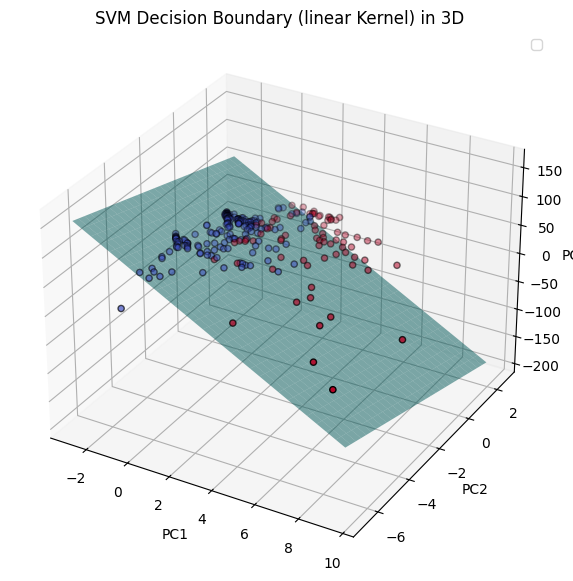

⚠️ Cannot extract explicit equation for poly kernel (Non-Linear)


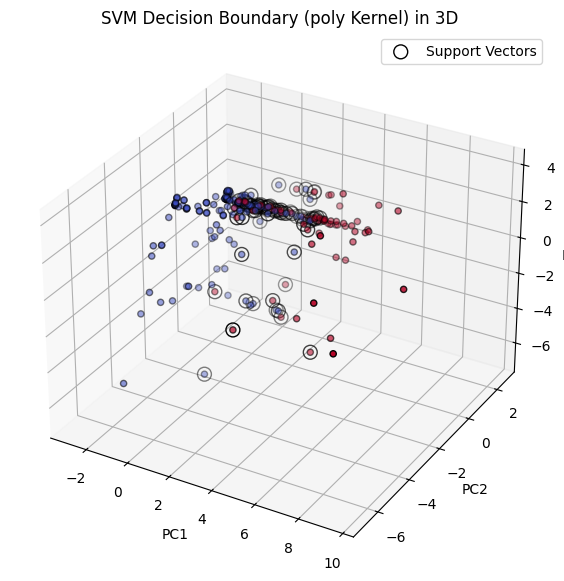

⚠️ Cannot extract explicit equation for rbf kernel (Non-Linear)


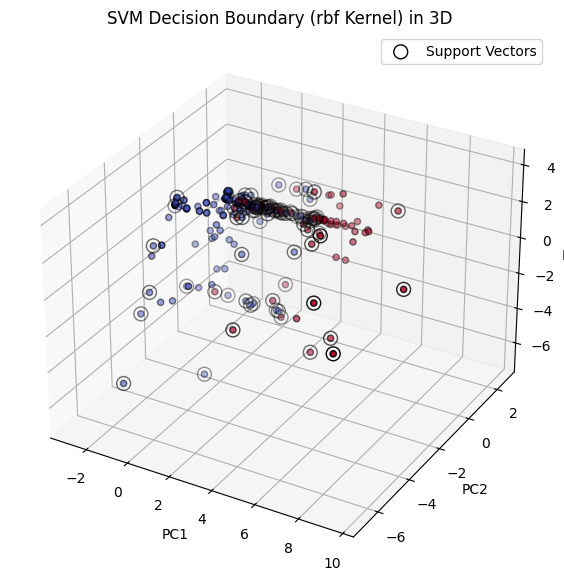

⚠️ Cannot extract explicit equation for sigmoid kernel (Non-Linear)


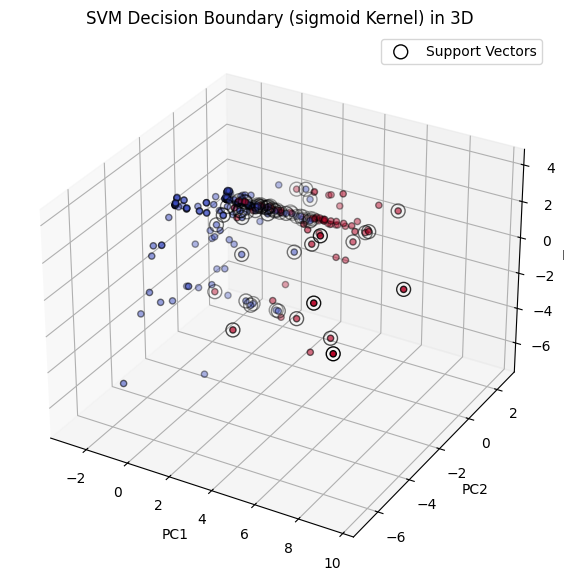

In [22]:
# Reduce X to 3D using PCA for visualization
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)
X_test_3d = pca.transform(X_test)

# Train SVM models with 3D features
svm_models_3d = {kernel: SVC(kernel=kernel).fit(X_train_3d, y_train) for kernel in trained_models.keys()}

# Plot decision boundary in 3D for each kernel
for kernel, model in svm_models_3d.items():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of data points
    scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_train, cmap='coolwarm', edgecolors='k')

    # Decision boundary for linear kernel (extract w and b)
    if kernel == "linear":
        w = model.coef_[0]  # Weight vector
        b = model.intercept_[0]  # Bias

        # Create mesh grid
        xx, yy = np.meshgrid(np.linspace(X_train_3d[:, 0].min(), X_train_3d[:, 0].max(), 30), np.linspace(X_train_3d[:, 1].min(), X_train_3d[:, 1].max(), 30))

        # Compute corresponding z values for the decision plane
        zz = (-w[0] * xx - w[1] * yy - b) / w[2]

        # Plot decision plane
        ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.5)

        # Print the hyperplane equation
        print(f"ℹ️ Equation of the decision plane for {kernel} kernel:")
        print(f"{w[0]:.3f} * x + {w[1]:.3f} * y + {w[2]:.3f} * z + {b:.3f} = 0")

    else:
        # Approximate decision boundary using support vectors for non-linear kernels
        sv = model.support_vectors_  # Get support vectors
        ax.scatter(sv[:, 0], sv[:, 1], sv[:, 2], s=100, facecolors='none', edgecolors='k', label="Support Vectors")

        print(f"⚠️ Cannot extract explicit equation for {kernel} kernel (Non-Linear)")

    # Labels and title
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(f"SVM Decision Boundary ({kernel} Kernel) in 3D")
    plt.legend()
    plt.show()
